### Part a) : Ordinary Least Square (OLS) on the Franke function

We will generate our own dataset for a function
$\mathrm{FrankeFunction}(x,y)$ with $x,y \in [0,1]$. The function
$f(x,y)$ is the Franke function. You should explore also the addition
of an added stochastic noise to this function using the normal
distribution $N(0,1)$.

*Write your own code* (using either a matrix inversion or a singular
value decomposition from e.g., **numpy** ) and perform a standard **ordinary least square regression**
analysis using polynomials in $x$ and $y$ up to fifth order.

Evaluate the mean Squared error (MSE)

### Imports

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




Degree 1: MSE = 0.030535987662423037
Degree 1: R2 = 0.6651251492286149
Degree 2: MSE = 0.025748941862908
Degree 2: R2 = 0.7176225914423828
Degree 3: MSE = 0.01690668181141918
Degree 3: R2 = 0.8145917986597379
Degree 4: MSE = 0.013328196446657696
Degree 4: R2 = 0.8538354860020257
Degree 5: MSE = 0.011561695532681682
Degree 5: R2 = 0.8732079306235957


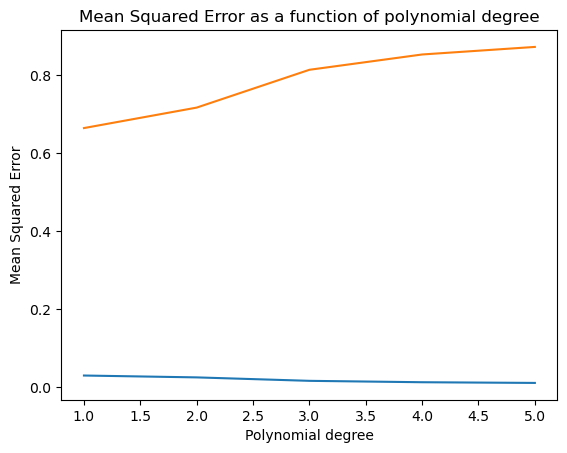

In [66]:
# Get the FrankeFunction. Using the function provided in the project description.

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4

def mean_squared_error_func(y_data, y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

def r2_score_func(y_data, y_model):
    return 1 - np.sum((y_data-y_model)**2)/np.sum((y_data-np.mean(y_data))**2)

# For this task we will not scale the data because the data is already in the range [0,1]
# Generate the data
np.random.seed(42)
n = 1000
x = np.random.uniform(0, 1, n)
y = np.random.uniform(0, 1, n)
noise = 0.1*np.random.normal(0, 1, n)
Z = FrankeFunction(x, y) + noise

# Potentially make this a function so that we can adjust the degree of the polynomial easily.
def prep_poly_feartures(x, y, degree):
  poly = PolynomialFeatures(degree)
  X_poly = poly.fit_transform(np.vstack((x,y)).T)
  return X_poly

def poly_regression_and_mse(degree, X, y, Z):
  X_poly = prep_poly_feartures(X, y, degree)
  model = LinearRegression()
  model.fit(X_poly, Z)
  Z_pred = model.predict(X_poly)
  mse = mean_squared_error(Z, Z_pred)
  r2 = r2_score(Z, Z_pred)
  return mse, r2
  
mse_results = {}
r2_result = {}
all_coefficients = {}
feature_names_list = {}
for degree in range(1,6):
  mse, r2 = poly_regression_and_mse(degree, x, y, Z)
  mse_results[degree] = mse
  r2_result[degree] = r2
  print(f"Degree {degree}: MSE = {mse}")
  print(f"Degree {degree}: R2 = {r2}")


plt.figure()
plt.plot(list(mse_results.keys()), list(mse_results.values()))
plt.plot(list(r2_result.keys()), list(r2_result.values()))
plt.xlabel('Polynomial degree')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error as a function of polynomial degree')
plt.show()
  